<a href="https://colab.research.google.com/github/KanikaRana29/Data-Science-Assignment/blob/main/Kanika_Rana_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing libraries**

In [ ]:
import pandas as pd
import numpy as np

**Importing the datasets**

In [ ]:
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

**Merge datasets for easy analysis as we don't have large datasets so we can easily perform operations on one merged dataset only**

In [ ]:
merged_data = pd.merge(transactions, customers, on="CustomerID", how="inner")

**Feature Engineering**

In [ ]:
# Total Spend per Customer
total_spend = merged_data.groupby("CustomerID")["TotalValue"].sum().reset_index(name="TotalSpend")
# Number of Transactions per Customer
transaction_count = merged_data.groupby("CustomerID").size().reset_index(name="TransactionCount")
# Average Transaction Value per Customer
average_transaction_value = total_spend["TotalSpend"] / transaction_count["TransactionCount"]
# Recency of Last Transaction
today = pd.Timestamp("2025-01-25")
merged_data["TransactionDate"] = pd.to_datetime(merged_data["TransactionDate"])
last_transaction = merged_data.groupby("CustomerID")["TransactionDate"].max().reset_index()
recency = (today - last_transaction["TransactionDate"]).dt.days

**Combining all features**

In [ ]:
customer_features = pd.DataFrame({
    "CustomerID": total_spend["CustomerID"],
    "TotalSpend": total_spend["TotalSpend"],
    "TransactionCount": transaction_count["TransactionCount"],
    "AverageTransactionValue": average_transaction_value,
    "Recency": recency
})

In [ ]:
# Drop CustomerID for clustering
X = customer_features.drop("CustomerID", axis=1)

**Normalization**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Finding the optimal number of clusters using the Elbow Method**

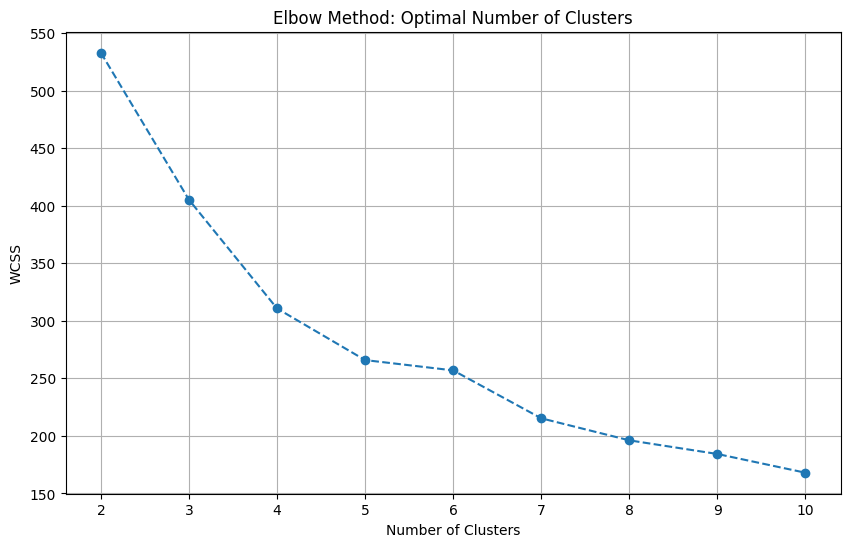

In [ ]:
wcss = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot WCSS against the number of clusters
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title("Elbow Method: Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.xticks(k_range)
plt.grid()
plt.show()

**Trying Different Clustering Algorithms**

In [ ]:
#from sklearn.mixture import GaussianMixture
# GMM Clustering
#gmm = GaussianMixture(n_components=num_clusters, random_state=42)
#labels = gmm.fit_predict(X_scaled)
#from sklearn.cluster import DBSCAN
# DBSCAN Clustering
#dbscan = DBSCAN(eps=0.5, min_samples=5)
#labels= dbscan.fit_predict(X_scaled)
from sklearn.cluster import KMeans
num_clusters = 4  # You can experiment with values between 2 and 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

In [ ]:
customer_features["Cluster"] = labels

**Evaluation Metrics**

In [ ]:
from sklearn.metrics import davies_bouldin_score, silhouette_score
db_index = davies_bouldin_score(X_scaled, labels)
silhouette_avg = silhouette_score(X_scaled, labels)

**Visualization using PCA**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

**Plotting Clusters**

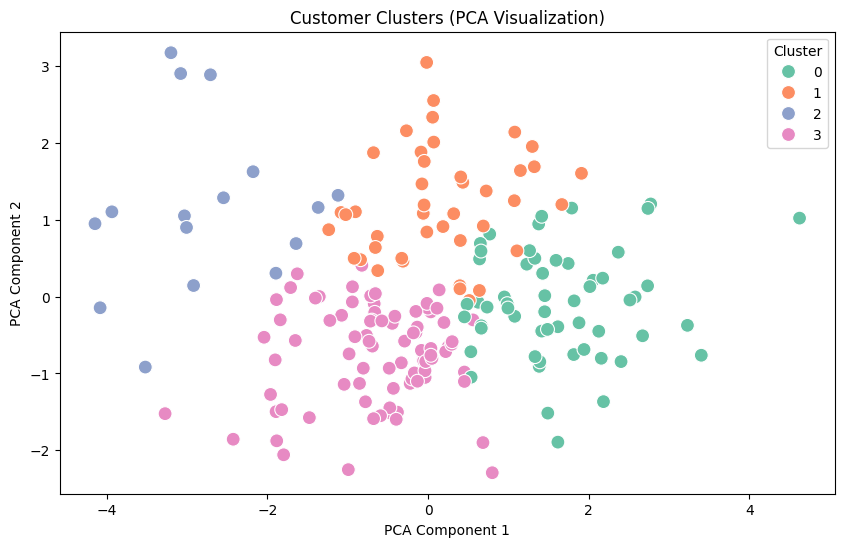

Number of clusters: 4
Davies-Bouldin Index: 0.9973378894992112
Silhouette Score: 0.3202798158336109


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette="Set2", s=100)
plt.title("Customer Clusters (PCA Visualization)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

# Report
print("Number of clusters:", num_clusters)
print("Davies-Bouldin Index:", db_index)
print("Silhouette Score:", silhouette_avg)